# Principal component analysis (PCA)
# 主成份分析




---






## 介紹
主成份分析是一種廣泛使用的非監督式演算法，可根據數據組表面的特徵(feature)突出其內部所存在的隱藏成分(component)且不依賴其標籤(label)。其運作基本上是一種降維演算法，也可作為可視化工具、噪聲過濾與特徵提取等。


---



## 概念
一般能收集的數據，如：

1.   生理資料：身高、體重、血壓等。
2.   基因表現量的microarray。

特徵與特徵之間經常彼此互相影響，如身高越高經常導致體重越重，基因與基因之間的表現彼此具有調控關係而存在相關性。然而，所有的特徵都列入考慮時，會造成資料的維度過高，這樣的性質經常不利於將數據可視化或是增加了分析上的困難度。

假設，這些特徵其實是來自於一群無法直接收集而來的隱藏成分所組成，且這些隱藏成分具有彼此之間不互相影響的特性，那麼可以藉由捨棄不重要的部份成分進行數據組的降維且能保留數據之間的大多數差異性。

因此主成份分析便是希望藉由對數據組進行分析而找出一個新的座標系統，使數據組的原有特徵會被轉換成新的隱藏成分，且新的座標系統的第一個向量能夠保有最大的數據組變化情況，而第二個向量則與第一個向量正交(在平面或三維空間中等同於垂直)且能夠保有次大的數據組變化情況。


---



## 數學推導
### 共變異數 covariance
共變異數是一種統計度量，藉由評估兩種不同特徵各自的變化情況與期望值相比，將兩者的變化趨勢一致性進行量化。例如：


1.   特徵A的變化趨勢上升時，特徵B的變化趨勢亦會上升；特徵A的變化趨勢下降時，特徵B的變化趨勢亦會下降，則共變異數大於零。
2.   特徵A的變化趨勢上升時，特徵B的變化趨勢為下降；特徵A的變化趨勢下降時，特徵B的變化趨勢卻會上升，則共變異數小於零。
3.   特徵A的變化與特徵B的變化彼此之間毫無關聯，則共變異數會等於零。

對於$X$與$Y$兩數列的共變異數計算如下：

$$cov(X,Y)=\frac{1}{n}\sum_{i=1}^{n} (x_i-E(X)) (y_i-E(Y))$$


實際上Pearson correlation coefficient (Pearson相關係數)是共變異數對於各自變異數(variance)的歸一化(normalization)結果：

$$PCC(X,Y)=\frac{cov(X,Y)}{\sqrt{var(X)\cdot var(Y)}}$$


### 共變異數矩陣 covariance matrix
當我們獲得具有多種特徵的數據組，我們可以藉由計算任意兩特徵之間的變化情況，去建構共變異數矩陣。

例如我們設計了一個可檢測10種基因的microarray，並且對50名受測者進行表現量的檢測，因此這50位受測者的基因表現量可以寫作一數據組(${\rm X}$)：

$${\rm X}=\begin{bmatrix}
    x_{1,1} & x_{1,2} & x_{1,3} & \dots  & x_{1,50} \\
    x_{2,1} & x_{2,2} & x_{2,3} & \dots  & x_{2,50} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{10,1} & x_{10,2} & x_{10,3} & \dots  & x_{10,50}
\end{bmatrix}
$$

其中每一個直行(column)代表一位受測者，而每一個橫列(row)代表每一種基因。

而任意2種基因可進行共變異數的計算，因此可獲得一個10*10的共變異數矩陣($\Sigma_{\rm X}$)：

$$\Sigma_{\rm X}=\begin{bmatrix}
    cov(G_1,G_1) & cov(G_1,G_2) & cov(G_1,G_3) & \dots  & cov(G_1,G_{10}) \\
    cov(G_2,G_1) & cov(G_2,G_2) & cov(G_2,G_3) & \dots  & cov(G_2,G_{10}) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    cov(G_{10},G_1) & cov(G_{10},G_2) & cov(G_{10}0,G_3) & \dots  & cov(G_{10},G_{10})
\end{bmatrix}
$$


若這10個基因之間彼此皆有一定程度的關聯性，我們可以預期這個矩陣的任意一個元素皆不為零。

###共變異數矩陣對角化
接下來我們希望找到一個座標轉換矩陣($\rm A$)，目的是將原始數據組(${\rm X}$)映射到成新的數據組(${\rm Z}$)：

$${\rm A}{\rm X}={\rm Z}$$

其中這個座標轉換矩陣必須滿足讓原本的共變異數矩陣($\Sigma_{\rm X}$)能夠轉換成新的共變異數矩陣($\rm \Lambda$)，而新的共變異數矩陣僅在對角上的元素有值，因為新的共變異數矩陣是由隱藏成分所組成，而隱藏成分彼此之間必須獨立：

$${\rm \Lambda}=\begin{bmatrix}
    \lambda_1 & 0 & 0 & \dots  & 0 \\
    0 & \lambda_2 & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  &\lambda_{10}
\end{bmatrix}
$$

從數學的角度而言，我們便是對矩陣($\Sigma_{\rm X}$)進行矩陣對角化(diagonalize)的操作，並求解未知的座標轉換矩陣($\rm A$)和新的共變異數矩陣($\rm \Lambda$)：

$$diag(\Sigma_{\rm X})={\rm A}^{-1}{\Sigma_{\rm X}}{\rm A}={\rm \Lambda}$$


###原始座標系統映射
當確認了座標轉換矩陣後，我們將一開始的數據組(${\rm X}$)利用座標轉換矩陣($\rm A$)映射到新的空間中，而獲得新數據組($\rm Z$)：

$${\rm A}{\rm X}={\rm Z}=\begin{bmatrix}
    z_{1,1} & z_{1,2} & z_{1,3} & \dots  & z_{1,50} \\
    z_{2,1} & z_{2,2} & z_{2,3} & \dots  & z_{2,50} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    z_{10,1} & z_{10,2} & z_{10,3} & \dots  & z_{10,50}
\end{bmatrix}
$$

其中每一個直行(column)仍然代表一位受測者，而每一個橫列(row)則為隱藏成分，或者被稱為主成分(principal component)。

### 主成分的排序與維度的降低

前述所提到的新共變異數矩陣($\rm \Lambda$)，實際上與映射後的主成分互相呼應。例如：
$\lambda_1$對應到的是映射後$\{z_{1,1}, z_{1,2}, z_{1,3}, ..., z_{1,50}\}$所代表的解釋變異量(explained variance)；$\lambda_2$對應到的是映射後$\{z_{2,1}, z_{2,2}, z_{2,3}, ..., z_{2,50}\}$所代表的解釋變異量。


對於這些新的隱藏成分，我們可以根據解釋變異量$\lambda$由大至小進行排序，其中擁有最大的解釋變異量則稱之為第一主成分(1st principal component)，次大的則稱之為第二主成分(2nd principal component)，其餘的以此類推。

由於排名較前的主成分意味著其擁有較多資訊量，因此我們可以藉由捨棄排名較後的主成分去降低數據組的維度，進而達到特徵提取或是噪聲過濾的功能。此外，藉由繪製數據組的前幾大主成分分布，亦能夠將數據組內較為重要的差異圖像化。


---



##範例一：從數學定義實作主成份分析

從前面我們暸解到主成份分析在實作上是對數據的共變異數矩陣進行對角化，找出其新的共變異數矩陣與轉換矩陣。



首先，我們先建立一個二維的數據資料($\rm X$)：

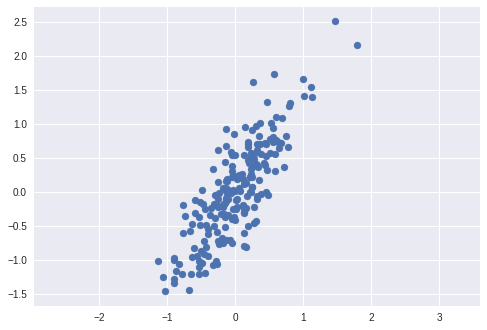

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(2)
X = np.dot(rng.rand(2,2), rng.randn(2,200))

plt.scatter(X[0,:], X[1,:])
plt.axis('equal')
plt.show()

我們可以觀察到，整體數據的分佈情況是隨著x值上升y值會隨之上升，因此我們可以預期我們的共變異數矩陣在cov(x,y)位置上將為一正值。

In [ ]:
cov_X = np.cov(X)
print("covarance matrix:\n", cov_X)
print("\ncov(x,y) =", cov_X[0,1])


covarance matrix:
 [[0.21862569 0.27529629]
 [0.27529629 0.51116229]]

cov(x,y) = 0.27529629234222425


接著，我們要對共變異數矩陣進行對角化。這個步驟在線性代數上等同於求矩陣的本徵向量(eigenvector)以及本徵值(eigenvalue)，我們可以利用numpy底下的工具完成。特別注意，由於求解本徵值的過程並不會自動排序，因此完成後我們必須重新排序。如下：

In [ ]:
eigvalue, eigvector = np.linalg.eigh(cov_X)

idx = eigvalue.argsort()[::-1]
eigvalue = eigvalue[idx]
eigvector = eigvector[:,idx]

print("eigenvalue:\n", eigvalue)
print("\neigenvector:\n", eigvector)

eigenvalue:
 [0.67663501 0.05315297]

eigenvector:
 [[ 0.51517079 -0.85708754]
 [ 0.85708754  0.51517079]]


我們將所找到的新座標系統繪製在原有的數據分佈，結果如下：

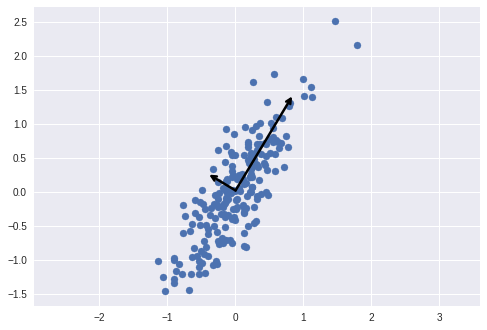

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2.5, shrinkA=0, shrinkB=0)
    ax.annotate('',v1, v0, arrowprops=arrowprops)

X_mean = np.average(X,axis=1)

plt.scatter(X[0,:], X[1,:])
for length, vector in zip(eigvalue, eigvector.T):
    v = vector * 1.96 * np.sqrt(length)
    draw_vector(X_mean, X_mean + v)
plt.axis('equal')
plt.show()

最後，我們將原始的數據映射到新的空間：

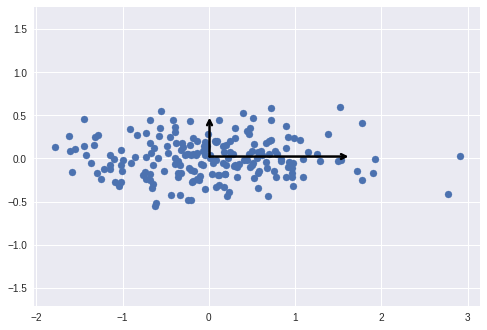

In [ ]:
Z=np.dot(eigvector.T, X)
plt.scatter(Z[0,:], Z[1,:])
for length, vector in zip(eigvalue, np.eye(2)):
    v = vector * 1.96 * np.sqrt(length)
    draw_vector(X_mean, X_mean + v)
plt.axis('equal')
plt.show()

無論進行噪聲過濾、降維、特徵提取等問題，是否能捨棄某個維度是一個十分重要的問題。評估的方式是藉由設置保留多少百分比的累積變異量來決定可以捨去多少不必要的成分。
而每個成分的變異量佔比可藉由下面的程式碼獲得：

In [ ]:
var_ratio = eigvalue / sum(abs(eigvalue))

print("explained variance ratio:\n", var_ratio)

explained variance ratio:
 [0.92716656 0.07283344]


在此例中，第一主成分的解釋力有0.927，而第二主成份的解釋力僅有0.073。換言之，當經過主成份分析後，第二主成份其實並不是十分重要的數據特徵。若降維在我們的研究中是必要的操作，則我們可以只保留第一主成份作為我們的數據特徵。



---



##範例二：使用sklearn套件實作主成份分析
sklearn提供了更迅速的套件進行主成份分析，我們依然使用範例一的二維數據資料進行實作，唯一要注意的是套件對於數據的橫列(row)定義為一組資料，而直行(column)則是資料的特徵，這和前面我們利用數學定義實作時有所不同：

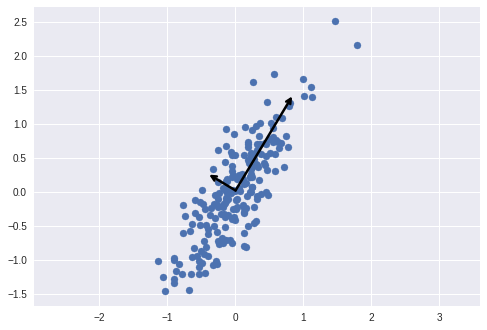

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X.T)
plt.scatter(X[0,:], X[1,:])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1.96 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_+v)
plt.axis('equal')
plt.show()

我們可以發現直接根據定義進行對角化求解與使用sklearn的套件進行分析，最後所獲得的結果是一致的。

同樣的，我們將原始數據映射到新的空間，如下：

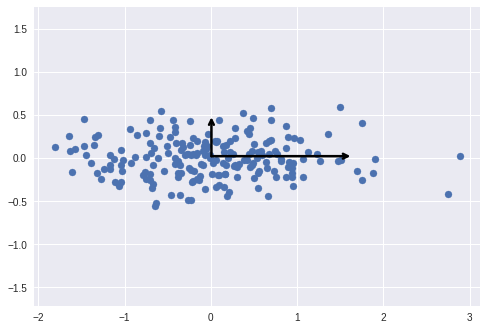

In [ ]:
Z = pca.transform(X.T)
plt.scatter(Z[:,0],Z[:,1])
for length, vector in zip(pca.explained_variance_, np.eye(2)):
    v = vector * 1.96 * np.sqrt(length)
    draw_vector(X_mean, X_mean + v)
plt.axis('equal')
plt.show()

sklearn的套件中，我們亦可以輕易地獲得每個成分的變異量佔比，只需呼叫物件的屬性即可：

In [ ]:
print("explained variance ratio:\n", pca.explained_variance_ratio_)

explained variance ratio:
 [0.92716656 0.07283344]


由於使用與範例一同一組數據，因此在變異數比例上，兩者所獲得的結果亦會是一致的。

##範例三：特徵臉(Eigenfaces)
在sklearn的資料集中，有一個可供練習用的人臉數據集Labeled Faces in the Wild。在此我們匯入並試著輸出一些數據集的資料：

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


目前匯入的數據集包含八位名人：

1. Ariel Sharon - 前以色列總理
2. Colin Powell - 前美國國務卿
3. Donald Rumsfeld - 前美國國防部長
4. George W Bush - 前美國總統
5. Gerhard Schroeder - 前德國總理
6. Hugo Chavez - 前委內瑞拉總理
7. Junichiro Koizumi - 前日本內閣總理大臣
8. Tony Blair - 前英國首相

圖片像素為62x47，共1348張。

在此我們挑出前十張出來檢視：

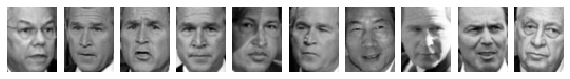

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(10, 1.2), 
                        subplot_kw={'xticks':[],  'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62,47), cmap='binary_r')

    

接著，我們嘗試使用主成份分析這些臉孔，希望將臉孔的「隱藏成分」找出來，而捨棄那些對於人臉辨識上較不重要的部份：

In [ ]:
pca = PCA()
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

由於這些臉孔的是高維度的，該捨棄多少不重要的成分，我們可以藉由累積共變異量來評估：

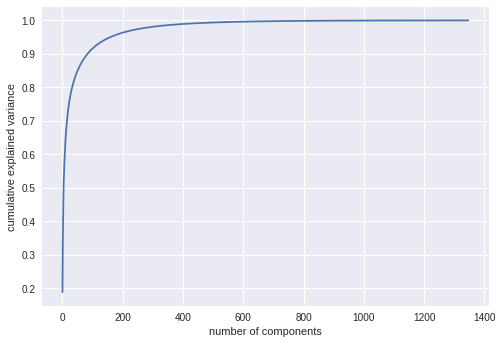

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

我們可以觀察到，原先的臉孔維度為62x47=2914，但實際上僅需要保留大約前100項主成份就可以保留超過90%的累積共變異量，而這些主成份所存在的向量，則被我們稱為「特徵臉」。

特徵臉最早是於1987年被提出，概念是我們所用來進行主成分分析的這些臉孔，每一張臉孔其實是各自由不同比例的特徵臉所組成。換言之，特徵臉可以說是這些臉孔所擁有的「共同臉孔」。

在此我們呈現前20張特徵臉：

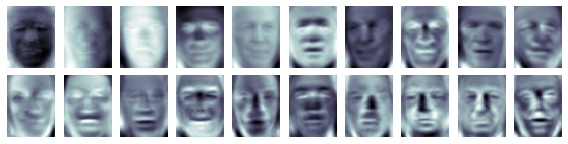

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(10, 2.4), 
                        subplot_kw={'xticks':[],  'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

接著我們把原始的臉孔映射到特徵臉中，藉此我們可以人臉中不必要的細節移除而不影響辨識。在此，我們比較了原圖、保留前10個、保留前50個、保留前100個主成份，共四種情況：

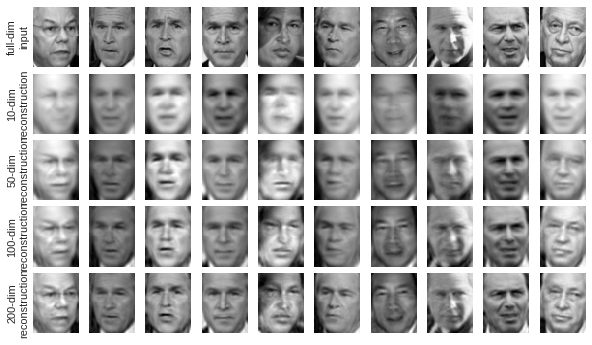

In [ ]:
pca.set_params(n_components=10)
pca.fit(faces.data)
projected_10 = pca.inverse_transform(pca.transform(faces.data))
pca.set_params(n_components=50)
pca.fit(faces.data)
projected_50 = pca.inverse_transform(pca.transform(faces.data))
pca.set_params(n_components=100)
pca.fit(faces.data)
projected_100 = pca.inverse_transform(pca.transform(faces.data))
pca.set_params(n_components=200)
pca.fit(faces.data)
projected_200 = pca.inverse_transform(pca.transform(faces.data))

fig, axes = plt.subplots(5, 10, figsize=(10, 6.0), 
                        subplot_kw={'xticks':[],  'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))


for i in range(10):
    axes[0, i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    axes[1, i].imshow(projected_10[i].reshape(62,47), cmap='binary_r')
    axes[2, i].imshow(projected_50[i].reshape(62,47), cmap='binary_r')
    axes[3, i].imshow(projected_100[i].reshape(62,47), cmap='binary_r')
    axes[4, i].imshow(projected_200[i].reshape(62,47), cmap='binary_r')
    
axes[0, 0].set_ylabel('full-dim\ninput')
axes[1, 0].set_ylabel('10-dim\nreconstruction');
axes[2, 0].set_ylabel('50-dim\nreconstruction')
axes[3, 0].set_ylabel('100-dim\nreconstruction');
axes[4, 0].set_ylabel('200-dim\nreconstruction');


我們可以看到，隨著保留的成分越多，我們能看到越多的臉孔細節被保留。至於被捨棄掉的細節，則我們亦可以明顯看到其實不影響臉孔的主要特徵。因此主成分分析能夠有效作為維度降低或是噪聲過濾的有效工具。



---



##總結
主成分分析可以視為揭露數據內部結構的一種運算。在一般資料收集上，往往會因為研究者的直覺判斷而收集過多的的變數，此時利用主成分分析去揭露數據的內部結構便可以剔除不必要的變數。

當然，主成分分析也有其適用的範圍。由於主成分分析利用共變異數去評估任意兩個變數之間的關係，對於變數之間類別差異較大而產生分佈區間不同的情況下，分佈較廣的變數往往也會在分析後佔有較大的比重。因此，是否要對原始數據進行某些預處理(如 normalization, standardization)便成為一個重要的課題。



---

